<a href="https://colab.research.google.com/github/jocelynandrade18/Repositorio2.-/blob/main/Predicci%C3%B3n_de_la_eficiencia_del_combustible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de la eficiencia del combustible**



**Conjunto de datos**


Base de datos de automoviles, para predecir la regrsión

In [1]:
pip install ucimlrepo # nombre del paquete de Python que se está instalando

In [3]:
from ucimlrepo import fetch_ucirepo # del repositorio importa y baja los repositorios

# fetch dataset
auto_mpg = fetch_ucirepo(id=9) # Carga el dataset "Auto MPG" del UCI ML Repository (ID 9) en la variable "auto_mpg"

# data (as pandas dataframes)
X = auto_mpg.data.features # Caracteristicas
y = auto_mpg.data.targets  # Mostrar el conjunto


In [4]:
X.head() # 7 parámetros para predecir: caballos de fuerza, año, peso, aceleración, origen...

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [5]:
y.head() # problema de conexión continua, donde mpg: Eficiencia de combustible

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Notamos cuantas variabes nulas tiene el conjunto X e y.

In [6]:
X.info() # columnas con 7 parámetros, elementos no nulos, unidades en numeros enteros y flotantes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [8]:
y.info() # Informa que conjuntos no nulos hay en el eje Y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Hacemos lo siguiente para eliminar las variable no nulas y eliminarlas simultaneamente.

In [9]:
import pandas as pd # Importamos pandas

df = pd.concat([X, y], axis=1).dropna() # concatenar las caracteristicas que son 7, pasar la columna de y en x y tenemos 8 columnas

In [11]:
df.shape #Verficicar que los valores esten dentro de una fila, columna

(392, 8)

Notamos cuantas variabes nulas tiene el conjunto

In [12]:
df.info() # Variables nulas dentro del DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [13]:
df.describe # estadisticamente así es el DataFrame: media,mediana,moda,cuartiles,quintiles...

<bound method NDFrame.describe of      displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin   mpg  
0         1  18.0  
1         1  15.0  
2         1  18.0  
3         1  16.0  
4         1  17.0  
..      ...   ...  
393       1  27.0  
394       2  44.0  
395       1  32.0  
396       1  28.0  
397       1  31.0  

[392 rows x 8 columns]>

Finalmente nuevamente, debemos definir los conjuntos X e y

In [14]:
X = df.drop('mpg', axis=1) # Definir quien es X
y = df['mpg'] # Define quien es Y

Dividir los datos en conjuntos de entrenamiento y prueba

In [20]:
from sklearn.model_selection import train_test_split # Importa la función esencial para dividir datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split( # Los resultados de la división en 4 variables
    X, y, # Conjuntos de datos a dividir: "X" son las características y 'y' es la variable objetivo
    test_size=0.2, # Define que el 20% de los datos se usará para el conjunto de prueba ('X_test', 'y_test')
    random_state=1 # Establece la aleatoriedad
)

In [18]:
print(X_train.shape) # test con 313 datos es el 80% de mis datos
print(X_test.shape) #test con 79 datos 20%

(313, 7)
(79, 7)


Escalar los datos para que los datos tengan una media de 0 y una desviación estándar de 1

In [22]:
from sklearn.preprocessing import StandardScaler # Que otros procesos para escandalizar existen

scaler = StandardScaler() # quiero que la desviación estándar sea 1
X_train = scaler.fit_transform(X_train) # Escalador del entrenamiento en media y desviación estándar
X_test = scaler.transform(X_test) # # Escalador del entrenamiento en media y desviación estándar

También, se puede utilizar, MinMaxScaler().

# **Red Neuronal Multicapa**

Definir el modelo de Red Neuroonal

In [24]:
import tensorflow as tf # Importa la biblioteca fundamental para el aprendizaje automático y redes neuronales
from tensorflow.keras import Sequential # Importa la clase base para crear un modelo de red neuronal
from tensorflow.keras.layers import Dense # Importa la clase para crear capas

# Definir el modelo
model = Sequential([  # Inicia la definición de un modelo de red neuronal secuencial
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Primera capa oculta (entrada): 64 neuronas, activación ReLU
    Dense(32, activation='relu'),  # Segunda capa oculta: 32 neuronas con activación ReLU.
    Dense(16, activation='relu'),  # Tercera capa oculta: 16 neuronas con activación ReLU.
    Dense(1)  # Capa de salida: 1 neurona (ideal para regresión, donde se predice un único valor continuo) y sin activación específica (lineal por defecto).
])

**Compilar el modelo**

Crear un optimizador Adam con una tasa de aprendizaje del 0.001

In [25]:
from tensorflow.keras.optimizers import Adam # Importamos Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001 # Tasa de aprendizaje de 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
model.compile( # Compila el modelo
    optimizer=adam_optimizer, # Optimiza el modelo
    loss='mean_squared_error', #error cuadrática promedio
    metrics=['root_mean_squared_error'], #error squared promedio, elevarlo al cuadrado
)

Entrenar el modelo

In [27]:
history = model.fit( # Entrena el modelo y define alamacenando pérdida de matrices
    X_train, y_train, # Datos de entrenamiento de las variables
    epochs=20, batch_size=1, #solo hay 20 épocas
    validation_data=(X_test, y_test) # Conjunto de datos para la validación
)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 383.9853 - root_mean_squared_error: 19.3034 - val_loss: 21.1583 - val_root_mean_squared_error: 4.5998
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.9785 - root_mean_squared_error: 3.7364 - val_loss: 15.7004 - val_root_mean_squared_error: 3.9624
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.5969 - root_mean_squared_error: 3.5279 - val_loss: 13.0912 - val_root_mean_squared_error: 3.6182
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0670 - root_mean_squared_error: 2.8027 - val_loss: 10.6984 - val_root_mean_squared_error: 3.2708
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3919 - root_mean_squared_error: 2.7018 - val_loss: 9.8461 - val_root_mean_squared_error: 3.1378
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.7179 - root_mean_squared_error: 2.9400 - val_loss: 10.0559 - val_root_mean_squared_error: 3.1711
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s

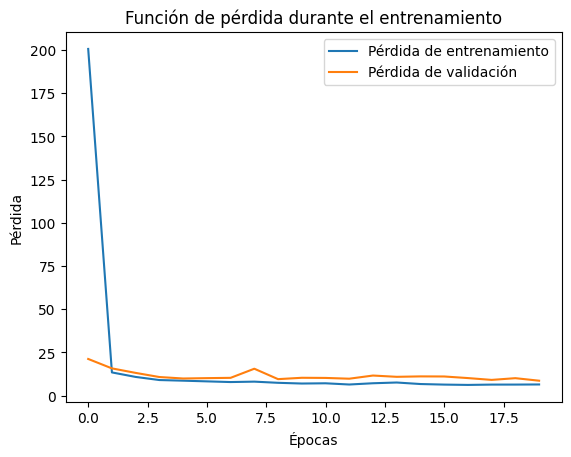

In [28]:
import matplotlib.pyplot as plt #Calcular la función de pérdida

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento') # Pérdida del entrenamiento
plt.plot(history.history['val_loss'], label='Pérdida de validación') # Pérdida de validación
plt.xlabel('Épocas') # Definimos la linea de las X
plt.ylabel('Pérdida') # Definimos la linea de las Y
plt.legend() # Separamos las líneas para identificar
plt.title('Función de pérdida durante el entrenamiento') #Titulo
plt.show() # Imprime la gráfica

Se nota que la función de pérdida debe tender hacia cero.

In [29]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)  # Evalúa el rendimiento final del modelo en datos de prueba no vistos y devuelve la pérdida y la métrica MAE.
print(f'Test Mean Absolute Error: {test_mae:.2f}')             # Imprime en consola el valor final del error absoluto medio (MAE) en el conjunto de prueba, formateado a dos decimales.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7775 - root_mean_squared_error: 2.7736  
Test Mean Absolute Error: 2.93


# **Predicciones**

Hacer predicciones y comparar las predicciones con los valores reales

In [30]:
predictions = model.predict(X_test) #tomamos datos al azar cuyos valores actuales predicen 21.76 modelos, los resultados son los errores
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()}) # Comparamos y predecimos la columna actual y de predicción
print(comparison.head()) # Muestra las primero 5 filas del DataFrame

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
     Actual  Predicted
82     23.0  22.270260
167    29.0  28.318365
356    32.4  34.933727
120    19.0  19.518295
385    38.0  38.911938


# **Otras métricas**

In [31]:
from sklearn.metrics import r2_score, mean_squared_error #sirven para predecir

r2 = r2_score(y_test, predictions) #r2 vive entre 0 y 1, valor cercano a 1 predice si los valores son tolerables
print(f'R²: {r2}') # el modelo sirve para describir y es bueno, porque tenemos el .86 de correlación

mse = mean_squared_error(y_test, predictions) # Predecimos el error de las Y
print(f'MSE: {mse}') # Muestra el error de la MSE

R²: 0.876352616851234
MSE: 8.57151793184501
